# Rule Based Classification Decision Tree

## *   Badal Parmar



# 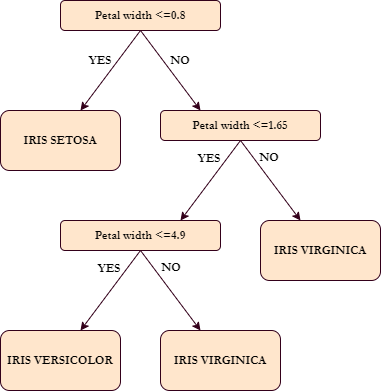


### **Above flow chart is prepared in draw.io for reference purpose**



# **Importing Required Libraries and Statements**

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# **Loading and Preparing Data**
*  There were no missing values in dataset
*  The last columns in the Dataset is "Label" and is renamed as"L"

In [ ]:
col_names = ['sepal length', 'sepal width','petal length','petal width','type']
data = pd.read_csv("Iris.csv",skiprows=1,header=None,names=col_names)
data.head(10)

,sepal length,sepal width,petal length,petal width,type
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


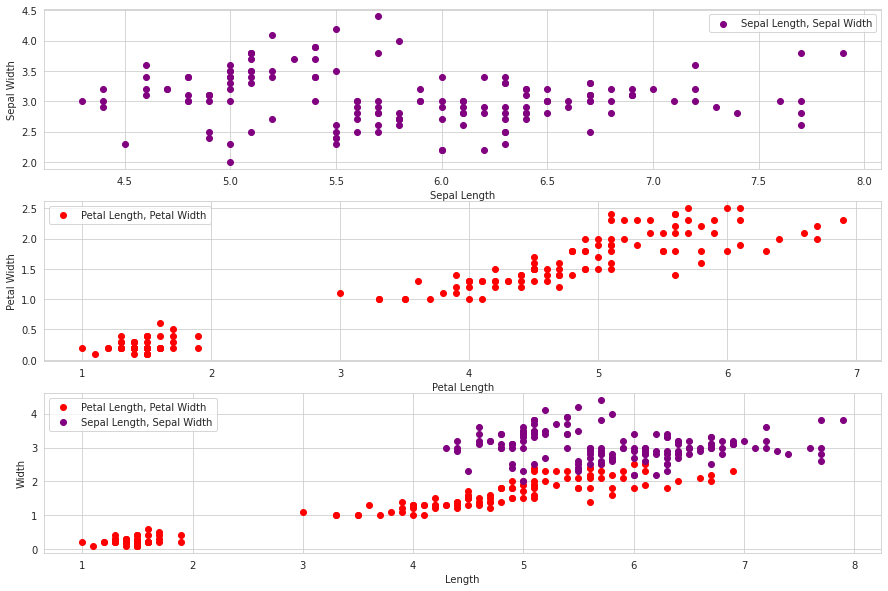

In [ ]:
plt.subplots(3, 1, figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c='purple', label='Sepal Length, Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# Petal Length, Petal Width

plt.subplot(3, 1, 2)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c='red', label='Petal Length, Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# Sepal Length, Sepal Width and Petal Length, Petal Width

plt.subplot(3, 1, 3)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c='red', label='Petal Length, Petal Width')
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c='purple', label='Sepal Length, Sepal Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.savefig('Plotting.png')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


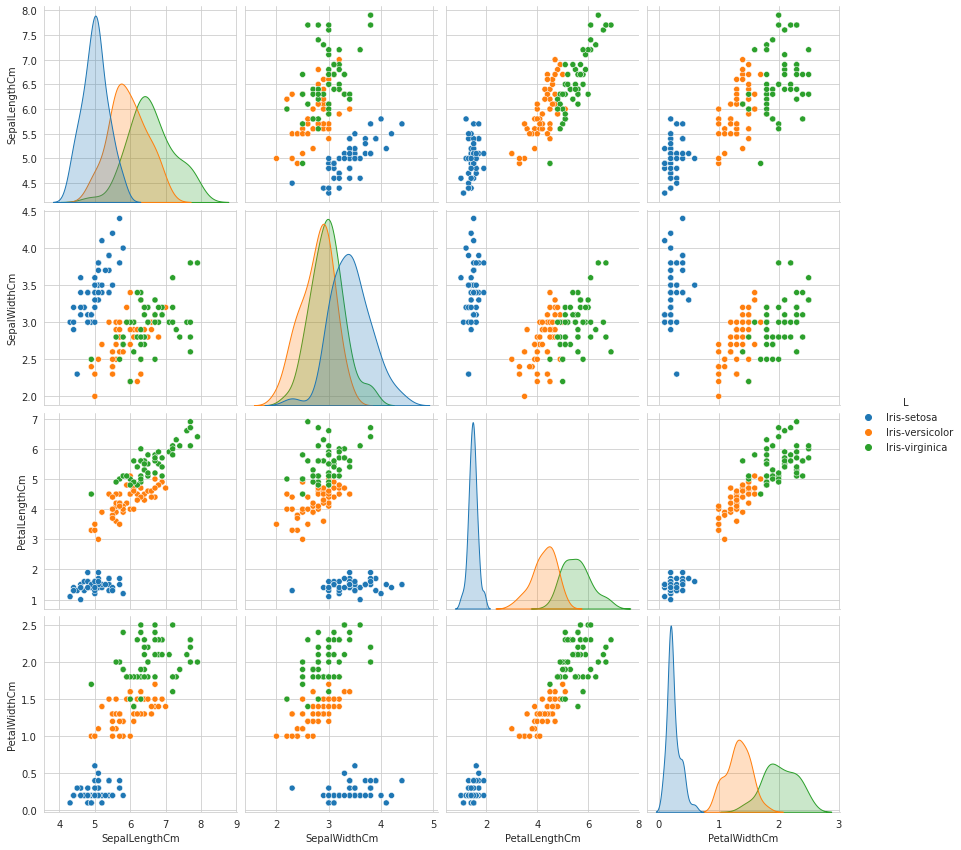

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='L',size=3)
plt.show()

# **Building the Decision Tree Regressor**

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

# **Algorithms**

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
          if tree.feature_index==0:
            print("IF Sepal Length  "+"<=", tree.threshold, "?", tree.info_gain)
            print("%s THEN left:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%s ELSE right:" %  (indent), end="")
            self.print_tree(tree.right, indent + indent)
          if tree.feature_index==1:
            print("IF Sepal Width "+"<=", tree.threshold, "?", tree.info_gain)
            print("%s THEN left:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%s ELSE right:" %  (indent), end="")
            self.print_tree(tree.right, indent + indent)
          if tree.feature_index==2:
            print("IF Petal Length"+"<=", tree.threshold, "?", tree.info_gain)
            print("%s THEN left:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%s ELSE right:" %  (indent), end="")
            self.print_tree(tree.right, indent + indent)
          if tree.feature_index==3:
            print("IF Petal width"+"<=", tree.threshold, "?", tree.info_gain)
            print("%s THEN left:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%s ELSE right:" %  (indent), end="")
            self.print_tree(tree.right, indent + indent)
            
    def print_rule(self, tree=None, indent=" ",rule=""):
        if not tree:
          tree=self.root

        if tree.value is not None:
          print(f"{rule} then class is {tree.value}")

        else:
          rule+=f"if {col_names[tree.feature_index]} <= {tree.threshold} and "
          self.print_rule(tree.left,indent+indent,rule)
        
          for idx in  range(len(rule)-1, -1, -1):
            if(rule[idx]=='<'):
              rule=rule[0:idx]+'>'+rule[idx+2:]
              break;
            
          self.print_rule(tree.right,indent+indent,rule)
          
          
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=9)


In [ ]:
tree = decision_tree_algorithm(train_df, max_depth=3)
pprint(tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.75': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}


**Using the Decision Tree Regressor made from scratch to fit the training data and to make predictions on the test data**

In [ ]:
model = DecisionTreeClassifier(min_samples_split=5, max_depth=5)
model.fit(X_train, y_train)
predictions = model.predict(np.array(X_test))

In [ ]:
print(accuracy_score(y_test, predictions))

1.0


In [ ]:
y_test

,0
135,2
90,1
145,2
147,2
60,1
37,0
26,0
3,0
75,1
9,0


In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)

## **Rules generated by the tree after fitting the training dataset**

In [ ]:
classifier.print_tree()
classifier.print_rule()

IF Petal Length<= 1.9 ? 0.31991131191432387
  THEN left:Iris-setosa
  ELSE right:IF Petal width<= 1.7 ? 0.3693701035382283
   THEN left:IF Petal Length<= 4.9 ? 0.09496676163342832
     THEN left:IF Petal width<= 1.6 ? 0.04996712689020377
         THEN left:Iris-versicolor
         ELSE right:Iris-virginica
     ELSE right:IF Petal width<= 1.5 ? 0.2222222222222222
         THEN left:Iris-virginica
         ELSE right:Iris-versicolor
   ELSE right:IF Petal Length<= 4.8 ? 0.016158818097876115
     THEN left:IF Sepal Length  <= 5.9 ? 0.4444444444444444
         THEN left:Iris-versicolor
         ELSE right:Iris-virginica
     ELSE right:Iris-virginica
if petal length <= 1.9 and  then class is Iris-setosa
if petal length > 1.9 and if petal width <= 1.7 and if petal length <= 4.9 and if petal width <= 1.6 and  then class is Iris-versicolor
if petal length > 1.9 and if petal width <= 1.7 and if petal length <= 4.9 and if petal width > 1.6 and  then class is Iris-virginica
if petal length > 1.